In [17]:
import numpy as np
import pandas as pd
import matplotlib as npl
import matplotlib.pyplot as plt

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
train_dir = r"C:\Users\SREEHARI\Desktop\Tata Steel\Data Files\train"

In [20]:
validation_dir =r"C:\Users\SREEHARI\Desktop\Tata Steel\Data Files\validation"

In [21]:
test_dir = r"C:\Users\SREEHARI\Desktop\Tata Steel\Data Files\test"

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen =ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale =1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode="binary")

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [25]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [27]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["accuracy"])

In [28]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,                                #2000/20=100
        epochs=20,
        validation_data= validation_generator,
        validation_steps = 50)                              #1000/20=50

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 139s 1s/step - loss: 0.6884 - accuracy: 0.5390 - val_loss: 0.6744 - val_accuracy: 0.5390
Epoch 2/20
100/100 [==============================] - 94s 943ms/step - loss: 0.6605 - accuracy: 0.6080 - val_loss: 0.6422 - val_accuracy: 0.6430
Epoch 3/20
100/100 [==============================] - 98s 976ms/step - loss: 0.6271 - accuracy: 0.6475 - val_loss: 0.6225 - val_accuracy: 0.6580
Epoch 4/20
100/100 [==============================] - 120s 1s/step - loss: 0.5888 - accuracy: 0.6915 - val_loss: 0.6352 - val_accuracy: 0.6210
Epoch 5/20
100/100 [==============================] - 94s 942ms/step - loss: 0.5482 - accuracy: 0.7160 - val_loss: 0.6066 - val_accuracy: 0.6700
Epoch 6/20
100/100 [==============================] - 94s 942ms/step - loss: 0.5184 - accuracy: 0.7415 - val_loss: 0.5839 - val_accuracy: 0.6840
Epoch 7/20
100/100 [==============================] - 94s 

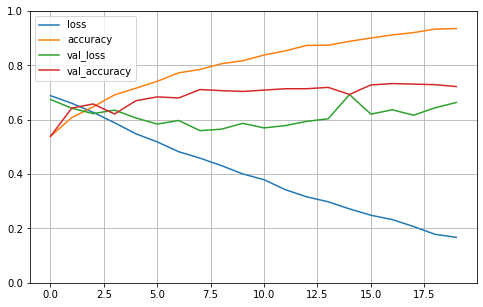

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [33]:
model.save("model.h5")

In [34]:
from tensorflow.keras import  backend as K

In [35]:
K.clear_session()
del model

# Data Augmentation

In [37]:
#Transformation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [38]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode="binary")

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))     #it will deactivate 50% neurons from each epoch. Effective to avoid overfitting

model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [41]:
model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["accuracy"])

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,                                #2000/20=100
        epochs=100,
        validation_data= validation_generator,
        validation_steps = 50)  

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()